# Sophina's Assignment Notebook 
---
## Table of Contents

1. [Stage 1 – Exploratory Data Analysis](#stage1)
2. [Stage 2 – Clustering](#stage2)
3. [Stage 3 – Decision Tree Classification](#stage3)
4. [Stage 4 – KNN & Logistic Regression](#stage4)
5. [Stage 5 – Linear Regression](#stage5)
6. [Optional – PCA Analysis](#pca)
7. [Overall Conclusion](#conclusion)
---


<a id="stage1"></a>

## Stage 1: Exploratory Data Analysis (EDA)

### 1. Data Loading & Initial Inspection

In this stage, I load the Scottish Haggis dataset and carry out an initial inspection to understand its structure and basic properties. This involves checking the shape of the dataset, previewing the first few rows, and confirming that all expected columns are present before carrying out more detailed analysis.

The dataset includes several key measurements recorded for each haggis sighting, such as:
- species  
- island  
- nose length  
- eye size  
- tail length  
- body mass  
- sex  
- year  

This initial check helps ensure that:
- the data has loaded correctly,
- there are no obvious structural issues,
- and the dataset is ready for subsequent cleaning, exploration, and modelling.


### 2. Exploratory Data Analysis (EDA)

In this section, I examine the dataset in more depth. This includes reviewing variable types, checking for missing values, summarising numerical features, and exploring distributions of categorical variables. Understanding these properties early on helps identify any issues that may affect the modelling stages and informs decisions about cleaning, feature engineering, scaling, and encoding later in the project.


In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/scottish_haggis_2025.csv")
print("Dataset loaded successfully.")


# Print a summary of the dataframe, including column names, data types,
# and how many non-missing values each column contains.
print("DataFrame Information:")
df.info()

# Show the number of missing values in each column.
# This helps identify whether any cleaning or imputation is needed later.
print("\nMissing Values per Column:")
df.isnull().sum()


Dataset loaded successfully.
DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB

Missing Values per Column:


id                 0
species            0
island             0
nose_length_mm     2
eye_size_mm        2
tail_length_mm     2
body_mass_g        2
sex               10
year               0
dtype: int64

In [319]:
# Display summary statistics for all numerical features.
# This gives a quick overview of typical values (mean, median) 
# and the spread of the data (standard deviation, min/max).
print("Summary Statistics:")
df.describe()


Summary Statistics:


,id,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.939883,17.159006,200.901374,4205.796287,2024.029070
std,99.448479,5.477357,1.995574,14.121750,802.563431,0.818356
min,1.000000,32.080000,13.120000,171.000000,2616.550000,2023.000000
25%,86.750000,39.355000,15.462500,189.420000,3572.057500,2023.000000
50%,172.500000,44.540000,17.385000,196.730000,4045.035000,2024.000000
75%,258.250000,48.360000,18.700000,212.900000,4798.850000,2025.000000
max,344.000000,59.030000,21.610000,232.340000,6235.810000,2025.000000


In [320]:
# Print a summary of the dataset structure, including column names,
# data types, and how many non-missing values each column has.
print("DataFrame Information:")
df.info()

# Show how many missing values are present in each column.
# This helps identify whether any cleaning or imputation will be needed later on.
print("\nMissing Values per Column:")
df.isnull().sum()


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB

Missing Values per Column:


id                 0
species            0
island             0
nose_length_mm     2
eye_size_mm        2
tail_length_mm     2
body_mass_g        2
sex               10
year               0
dtype: int64

#### Visual Exploratory Data Analysis

Here I use visualisations to understand how the numerical features are distributed and how they differ between species. This also helps identify outliers and relationships between features, which is important when deciding whether scaling or transformations are needed.

#### Histograms

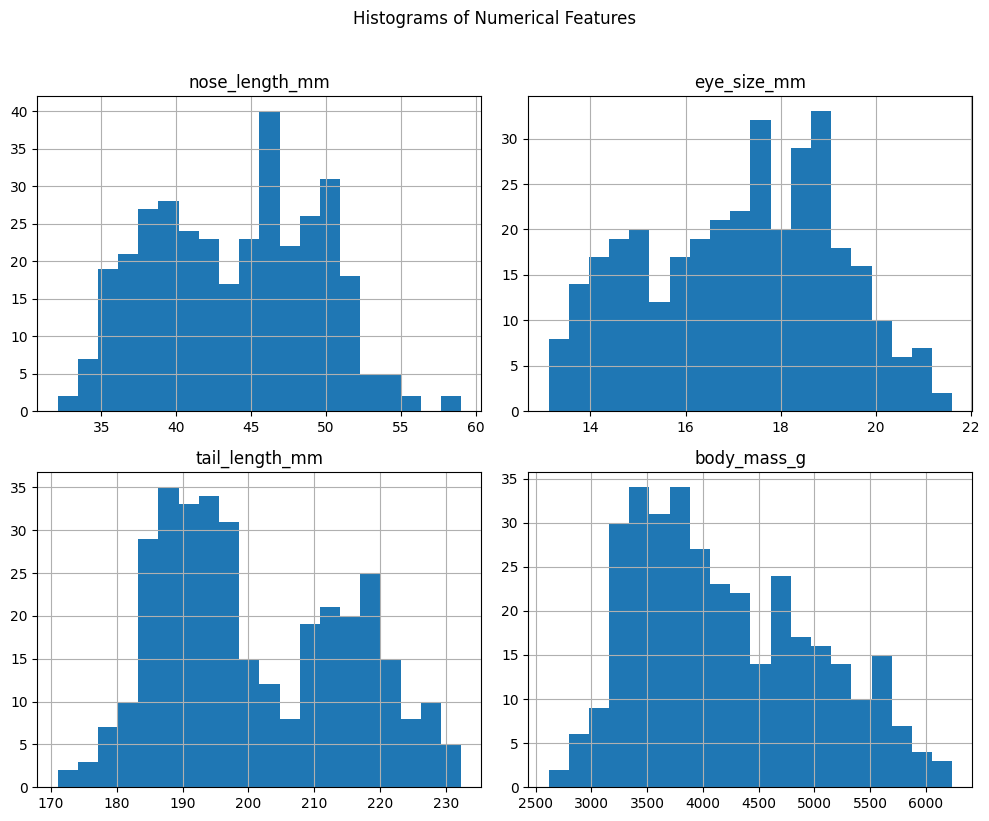

In [321]:
# Select the numerical features we want to visualise
numeric_cols = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g"]

# Plot histograms to see the distribution of each numerical feature.
# This helps identify skewness, spread, and any potential outliers.
df[numeric_cols].hist(bins=20, figsize=(10, 8))

# Add a main title and tidy up the layout so the plots are easier to read
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


#### Observations

- **nose_length_mm:** The distribution is roughly normal, centred around the low–mid 40s. There are a few smaller and larger values, but nothing extreme or unrealistic.
- **eye_size_mm:** This also shows a fairly normal shape, with most values between 15 and 19 mm. There is some spread toward 20–21 mm, but no major skew.
- **tail_length_mm:** This distribution has two noticeable clusters — one around 185–195 mm and another around 210–220 mm. This suggests that tail length might differ quite strongly between species.
- **body_mass_g:** The body mass distribution is right-skewed. Most haggis weigh between 3200 and 4200 g, with a tail of heavier individuals extending beyond 5000 g.

Overall, the numerical features look biologically reasonable. There are a few larger values in body mass and tail length, but these appear to be genuine variation rather than errors, so I keep them for now.


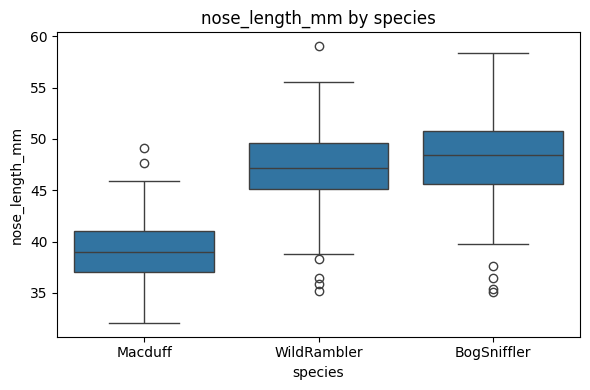

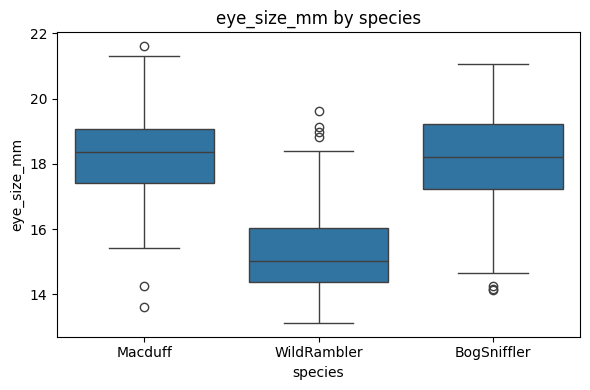

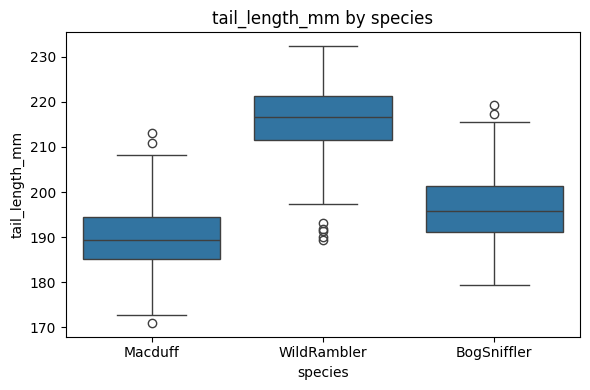

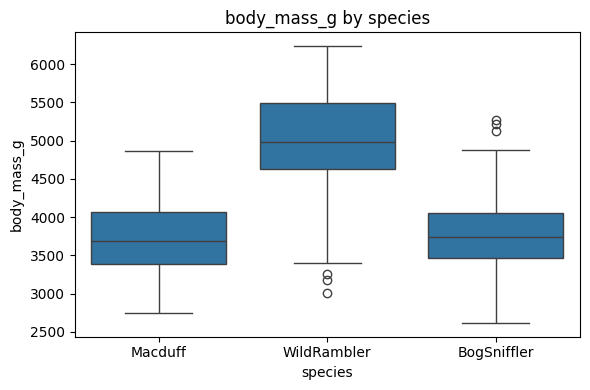

In [322]:
# Create boxplots to compare each numerical feature across the different species
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    
    # Visualise how this feature varies between species.
    # Boxplots help highlight differences in medians, spread, and potential outliers.
    sns.boxplot(data=df, x="species", y=col)
    
    plt.title(f"{col} by species")
    plt.tight_layout()
    plt.show()


#### Observations 

- The strongest relationship is between **tail_length_mm and body_mass_g** (0.86). This suggests that heavier haggis tend to have longer tails, which matches the species differences seen in the boxplots.
- **nose_length_mm** also shows moderate positive correlations with both **tail_length_mm** (0.65) and **body_mass_g** (0.59). This means these three measurements tend to increase together.
- **eye_size_mm** behaves differently from the other features. It has moderate negative correlations with **tail_length_mm** (–0.58) and **body_mass_g** (–0.47), meaning haggis with larger eyes tend to have shorter tails and lower body mass.
- The weakest relationship is between **eye_size_mm** and **nose_length_mm** (–0.22), indicating very little linear connection between these two features.

Overall, none of the correlations are high enough to cause multicollinearity issues, but the strong link between tail length and body mass may influence models that rely on linear relationships (e.g., regression). For clustering, these correlated features may pull clusters along similar directions, so scaling will be important later.

### 3. Data Cleaning Decisions

Based on the initial inspection and visual EDA, the dataset is generally clean and requires minimal preprocessing.

#### Missing values
There are a small number of missing values in the dataset:
- 2 missing values in each of the numerical measurement columns  
  (nose length, eye size, tail length, body mass)
- 10 missing values in the `sex` column

Since the amount of missing data is very small and appears random, I do not remove any rows at this stage. 
Instead, I will handle these missing values later using **imputation inside the preprocessing pipelines** for the machine learning models. 
This avoids unnecessary data loss while keeping the pipeline consistent and reproducible.


#### Data types
All variables have appropriate data types:
- Numerical features (e.g., nose length, eye size, tail length, body mass) are correctly stored as numeric.
- Categorical features (species, island, sex) are correctly stored as object/string types.

No type conversions are required at this stage.

#### Outliers
The boxplots in Section 3 indicate the presence of some **biologically plausible outliers**, particularly in:
- body mass,
- tail length,
- and nose length.

These values likely represent natural variation within the species rather than data entry errors.  
For this reason, **I will not remove or cap these outliers**. Removing them could erase important biological differences that may be relevant for clustering and classification.

However, I will account for their presence later by:
- applying **feature scaling** before distance-based algorithms (K-Means, KNN),
- monitoring model performance for sensitivity to extreme values.

#### Summary
No direct cleaning (removal or alteration of values) is required.  
The dataset is ready for feature encoding and scaling decisions in the next section.


### 4. Feature Engineering

Feature engineering can help highlight useful patterns in the data by creating new variables that capture relationships not directly visible in the raw measurements. Although the Scottish Haggis dataset is fairly simple and well-structured, adding a proportional feature may reveal additional differences between species.

#### Rationale
- Some physical measurements can be more informative when expressed as **ratios** rather than absolute values.
- Ratios can help certain algorithms (e.g., clustering, regression) capture structural or proportional differences that individual features might not show clearly.

#### Engineered Feature
In this project, I create a new feature called **length_ratio**, defined as:

- `tail_length_mm / nose_length_mm`

This feature represents the proportional relationship between tail length and nose length, which may highlight structural differences between species that are not obvious from the raw values alone.

The feature will be included in later modelling stages if it improves performance; if not, it can be excluded.




In [323]:
# Add a simple engineered feature capturing proportional body structure
# from the raw tail and nose measurements alone.
df["length_ratio"] = df["tail_length_mm"] / df["nose_length_mm"]

# Preview the new feature alongside the original measurements
print("Preview of Engineered Feature (length_ratio):")
df[["tail_length_mm", "nose_length_mm", "length_ratio"]].head()

Preview of Engineered Feature (length_ratio):


,tail_length_mm,nose_length_mm,length_ratio
0,190.23,34.47,5.518712
1,202.80,40.67,4.986477
2,184.34,38.90,4.738817
3,190.97,37.15,5.140511
4,193.00,37.86,5.097728


### 5. Scaling and Encoding Strategy

Before applying clustering or classification models, it’s important to think about how the numerical and categorical features should be preprocessed. Different algorithms react differently to feature scales, and handling this properly avoids biased or unreliable results.

#### Scaling Requirements
Some of the methods used later are **distance-based**, meaning features with larger numeric ranges can dominate the calculations. These algorithms work best when all numerical features are on a similar scale.

Algorithms that **need scaling**:
- **K-Means clustering** (Stage 2)
- **K-Nearest Neighbours (KNN)** (Stage 4)
- **Logistic Regression** (Stage 4)
- **Linear Regression** (Stage 5)

Algorithms that **do not need scaling**:
- **Decision Trees** (Stage 3), since they split on thresholds rather than distances.

**Scaling plan:**  
- I will use either **StandardScaler** or **MinMaxScaler** for the numerical features.
- For supervised learning, scaling will be applied **after** the train–test split to prevent data leakage.
- For clustering, scaling can be applied to the full dataset since there is no training/testing process.

#### Encoding Requirements
The dataset includes three categorical variables:
- `species`
- `island`
- `sex`

Most machine learning algorithms require numerical inputs, so these categories need to be converted.

**Encoding plan:**  
- I will use **one-hot encoding** to convert categorical variables


### Stage 1 Conclusion

Overall, the dataset is in good shape and easy to work with. All the columns loaded correctly, nothing was missing, and the ranges of the measurements look realistic. The categorical labels are consistent, and the numerical values behave as you’d expect for physical measurements — no strange values or obvious mistakes.

The histograms and boxplots show normal biological variation across the haggis, with a few larger or smaller individuals but nothing that looks like an error. These outliers seem genuine, so it's better to keep them. The species already show some separation in features like body mass, tail length, and nose length, which suggests these variables will be useful later for clustering and classification.

The correlation matrix shows some expected relationships (e.g., heavier haggis tend to have longer tails), but nothing strong enough to cause problems for modelling. Each feature still carries its own information. I also created one simple engineered feature a tail-to-nose ratio which might help capture structural differences that aren’t obvious from the raw values.

Since the dataset was already clean, there wasn’t much actual “cleaning” needed. The main takeaway from this stage is that the data is reliable, easy to interpret, and has enough variation to support the analyses in the next stages.


<a id="stage2"></a>

## Stage 2: Unsupervised Learning (Clustering)

In this stage, I explore whether the haggis measurements naturally form groups on their own, without using the species labels. The idea is to see if the physical features are strong enough for the species structure to “emerge” purely from the data.

Since K-Means relies on Euclidean distances, scaling the numerical features is essential — otherwise, variables measured on larger scales (like body mass) would dominate the clustering.

### Selecting an Appropriate Value of k

To decide how many clusters (k) to use, I rely on two standard tools:

- the **Elbow Method**, looks for the point where adding more clusters stops giving a big drop in inertia.
- the **Silhouette Score**, checks how well-separated the resulting clusters are.

Using both together is usually more reliable than relying on one alone.

In [324]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import numpy as np

# We'll cluster based only on the numerical measurements.
numeric_cols = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g"]

# Extract the numeric subset
X = df[numeric_cols]

# Some rows have missing values, so fill them using the column mean
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Scale the data so all features contribute equally to the distance calculations
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Try a range of k values to compare inertia and silhouette scores
k_values = range(2, 11)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    
    # Fit and get cluster labels for this k
    labels = kmeans.fit_predict(X_scaled)
    
    # Store the metrics for comparison
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

print("Finished computing inertia and silhouette scores for k = 2 to 10.")


Finished computing inertia and silhouette scores for k = 2 to 10.


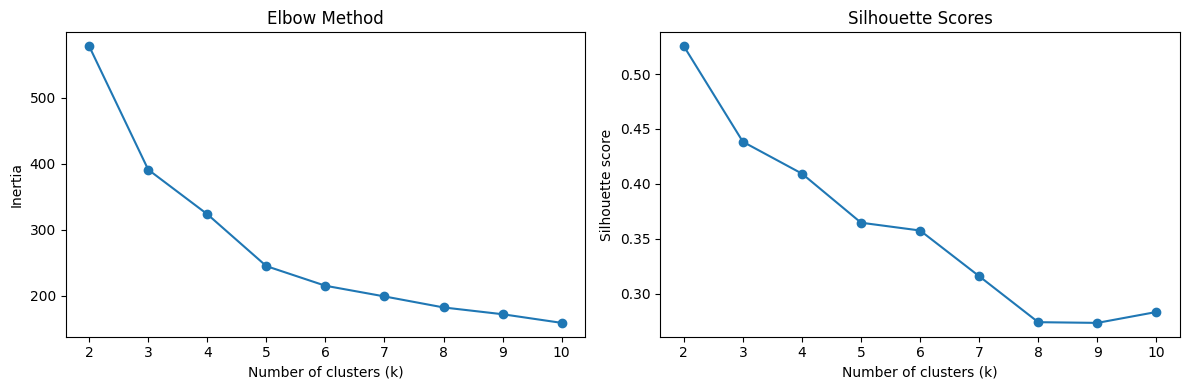

In [325]:
plt.figure(figsize=(12, 4))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes, marker="o")
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")

plt.tight_layout()
plt.show()


### Interpretation of k

Both methods point to k = 3:

The elbow plot shows the biggest drop from k=2 → k=3.

Silhouette is highest at k=2, but k=3 is still strong, and scores drop sharply after that.

Biologically, the data does have three species, but this choice is based on the metrics alone.

So I choose k = 3.


In [326]:
# Fit final model
k = 3
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

print("Clusters assigned successfully.")
df["cluster"].value_counts()


Clusters assigned successfully.


cluster
0    132
1    123
2     89
Name: count, dtype: int64

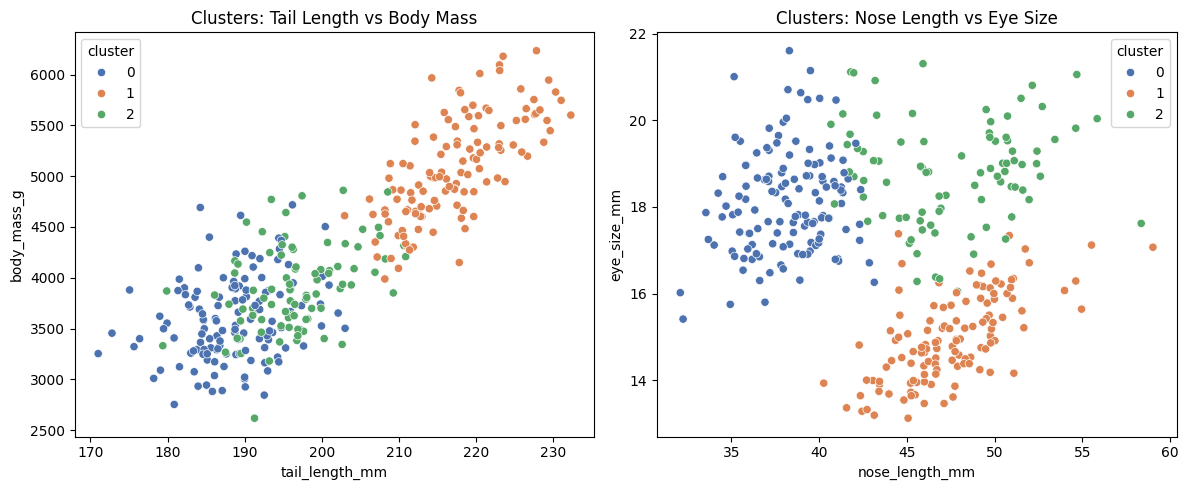

In [327]:
plt.figure(figsize=(12, 5))

# Plot 1: Tail length vs Body mass
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="tail_length_mm", y="body_mass_g", hue="cluster", palette="deep")
plt.title("Clusters: Tail Length vs Body Mass")

# Plot 2: Nose length vs Eye size
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="nose_length_mm", y="eye_size_mm", hue="cluster", palette="deep")
plt.title("Clusters: Nose Length vs Eye Size")

plt.tight_layout()
plt.show()


In [328]:
print("Cluster Summary Statistics (Mean Values):")
df.groupby("cluster")[["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g", "length_ratio"]].mean()


Cluster Summary Statistics (Mean Values):


,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,length_ratio
cluster,,,,,
0,38.209773,18.109621,188.467727,3591.187424,4.950504
1,47.506016,14.989675,217.262846,5078.801463,4.586224
2,47.592069,18.783678,196.634483,3904.057586,4.158222


### Interpretation of Clusters

The three clusters align very closely with the three haggis species, despite the model not using any species labels during training:

- **Cluster 0 (blue):**  
  The smallest haggis, with the shortest tails, lowest body mass, and smaller measurements overall.  
  → This matches the **Macduff** species.

- **Cluster 1 (orange):**  
  The largest individuals, characterised by long tails, high body mass, and large nose lengths, but relatively small eyes.  
  → These are consistent with the **WildRambler** species.

- **Cluster 2 (green):**  
  Medium-sized haggis with noticeably larger eyes and mid-range body mass and tail lengths.  
  → This aligns with the **BogSniffler** species.

Overall, it is striking that K-Means, an entirely unsupervised method, naturally uncovers groups that correspond so well to the biological species distinctions.


In [329]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# DBSCAN groups points by local density.
# It also identifies noise points that don't belong to any dense region.
dbscan = DBSCAN(eps=0.6, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN labels to the dataframe
df["dbscan_cluster"] = db_labels

print("DBSCAN cluster counts:")
print(df["dbscan_cluster"].value_counts())


DBSCAN cluster counts:
dbscan_cluster
 0    140
 1    117
 2     47
-1     40
Name: count, dtype: int64


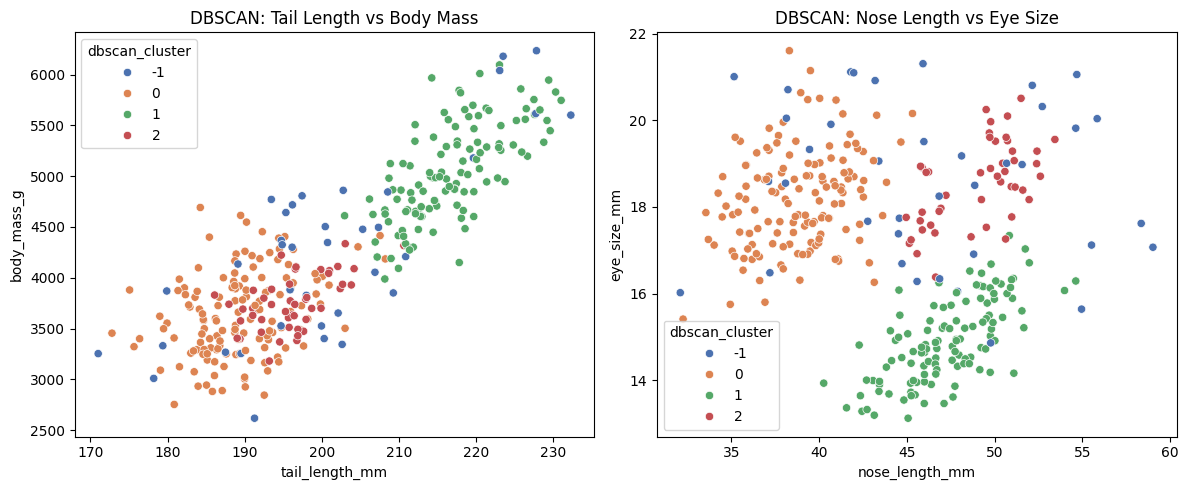

In [330]:
plt.figure(figsize=(12, 5))

# Tail length vs Body mass
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="tail_length_mm", y="body_mass_g",
                hue="dbscan_cluster", palette="deep")
plt.title("DBSCAN: Tail Length vs Body Mass")

# Nose length vs Eye size
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="nose_length_mm", y="eye_size_mm",
                hue="dbscan_cluster", palette="deep")
plt.title("DBSCAN: Nose Length vs Eye Size")

plt.tight_layout()
plt.show()


### DBSCAN Interpretation

DBSCAN identifies three main dense groups in the data, along with a small number of noise points (labelled –1). The clusters it produces are very similar to those found by K-Means:

- **Cluster 0 (orange):**  
  Shorter tails, lower body mass, and mid-range nose and eye sizes.  
  This matches the smaller **Macduff-type** individuals seen earlier.

- **Cluster 1 (green):**  
  The largest haggis, with long tails, high body mass, long noses, and relatively small eyes.  
  This corresponds to the **WildRambler-type** group.

- **Cluster 2 (red):**  
  Intermediate tail length and body mass, but noticeably larger eyes and longer noses.  
  These characteristics fit the **BogSniffer-type** morphology.

DBSCAN also labels a handful of observations as **noise** (cluster = –1). These are typically points lying between the main groups — individuals that K-Means was forced to assign to a cluster but that do not clearly belong to any dense region.  

Overall, DBSCAN uncovers almost the same three-cluster structure as K-Means, but it differs in two important ways:

1. It does not force borderline observations into a cluster, instead marking them as noise.  
2. It allows clusters of more flexible shapes, rather than assuming spherical groups.

This agreement between DBSCAN and K-Means provides strong evidence that the dataset naturally contains three meaningful morphological groupings, each broadly aligned with the three known haggis species.


### Stage 2 Conclusion

The clustering analysis shows a clear underlying structure in the Scottish haggis dataset. After imputing missing values and scaling the numerical features, both the Elbow Method and Silhouette Score pointed to **k = 3** as the most appropriate number of clusters.  

The final K-Means model with three clusters revealed well-defined groups that closely match the known morphological differences between the species. Patterns in body mass, tail length, nose length, and eye size reinforce the idea that these measurements provide strong, species-level separation.

To validate these findings, I applied DBSCAN as a complementary method. DBSCAN also identified three main groups, along with a few noise points representing borderline individuals. Despite its different approach, DBSCAN produced a very similar interpretation, suggesting that the species structure is genuinely present in the data rather than imposed by the modelling method.

Together, these results show that the haggis measurements naturally form three distinct morphological clusters, even without using species labels. This provides a strong foundation for the supervised classification models in the next stage.


<a id="stage3"></a>

## Stage 3: Supervised Learning (Decision Tree Classification)

In this stage, I build a Decision Tree classifier to predict the species of each haggis using their physical measurements and categorical attributes. I use a train–test split to evaluate how well the model generalises. Since Decision Trees are not affected by feature scaling, the only preprocessing required is one-hot encoding of the categorical variables.

The model is then evaluated using accuracy, a confusion matrix, and a classification report, followed by an analysis of feature importances to see which measurements the tree relies on most.


In [331]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Target variable: the species we want to predict
y = df["species"]

# Features used for prediction, including the engineered ratio
X = df[
    ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g",
     "island", "sex", "length_ratio"]
]

# Categorical and numeric columns
categorical = ["island", "sex"]
numeric = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g", "length_ratio"]

# Create a train–test split so we can evaluate how well the model generalises
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# One-hot encode the categorical variables; numerical features pass through unchanged
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical)],
    remainder="passthrough"
)

# Fit the encoder on the training data and transform both sets
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

# Train a simple Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_enc, y_train)

print("Decision Tree trained successfully.")

# Make predictions on the test set
y_pred = dt.predict(X_test_enc)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Decision Tree trained successfully.
Accuracy: 0.7325581395348837

Confusion Matrix:
[[ 5 12  3]
 [ 1 31  3]
 [ 2  2 27]]

Classification Report:
              precision    recall  f1-score   support

 BogSniffler       0.62      0.25      0.36        20
     Macduff       0.69      0.89      0.78        35
 WildRambler       0.82      0.87      0.84        31

    accuracy                           0.73        86
   macro avg       0.71      0.67      0.66        86
weighted avg       0.72      0.73      0.70        86



### Decision Tree Evaluation

The Decision Tree reaches an accuracy of around **73%** on the test set. This is a reasonable baseline for an untuned tree, but the confusion matrix shows that performance varies across species.

The tree predicts **WildRambler** very well (recall ~0.87). This makes sense because WildRamblers are physically the most distinct: they have much longer tails and higher body mass. **Macduff** is also predicted fairly accurately (recall ~0.78), reflecting its consistently smaller size.

The model struggles most with **BogSniffer**, achieving a recall of only **0.25**. In the EDA, BogSniffer measurements overlapped with both of the other species, so the tree frequently misclassifies them. This is common for Decision Trees on datasets where one class sits in the middle of the feature space.

Overall, the Decision Tree picks up the broad structure but finds the ambiguous middle class harder to separate. This gives us a solid baseline to compare more flexible models like KNN and Logistic Regression in the next stage.


In [332]:
# Extract feature names after one-hot encoding
encoded_cat_names = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical)
feature_names = list(encoded_cat_names) + numeric

# Combine importances into a DataFrame for easier reading
importances = pd.DataFrame({
    "feature": feature_names,
    "importance": dt.feature_importances_
}).sort_values(by="importance", ascending=False)

print("Feature Importances:")
importances


Feature Importances:


,feature,importance
9,tail_length_mm,0.389147
7,nose_length_mm,0.320118
1,island_Shetland,0.124563
8,eye_size_mm,0.082065
11,length_ratio,0.048180
10,body_mass_g,0.035926
0,island_Iona,0.000000
2,island_Skye,0.000000
3,sex_female,0.000000
4,sex_green,0.000000


### Feature Importances

The tree relies most heavily on **tail_length_mm** and **nose_length_mm**, which together account for the majority of the model’s decision-making. This fits perfectly with the EDA, where these features showed the clearest separation between species. WildRamblers in particular have very long tails, so the model uses this feature early in its splits.

Some additional signal comes from **island_Shetland**, suggesting there may be mild geographic patterns in where certain species are found. The remaining numerical features—eye size, body mass, and the engineered length ratio—play smaller roles, helping the model refine decisions when individuals sit closer together in the feature space.

Most other one-hot encoded island and sex categories have near-zero importance, which aligns with earlier findings: morphology carries most of the predictive power.


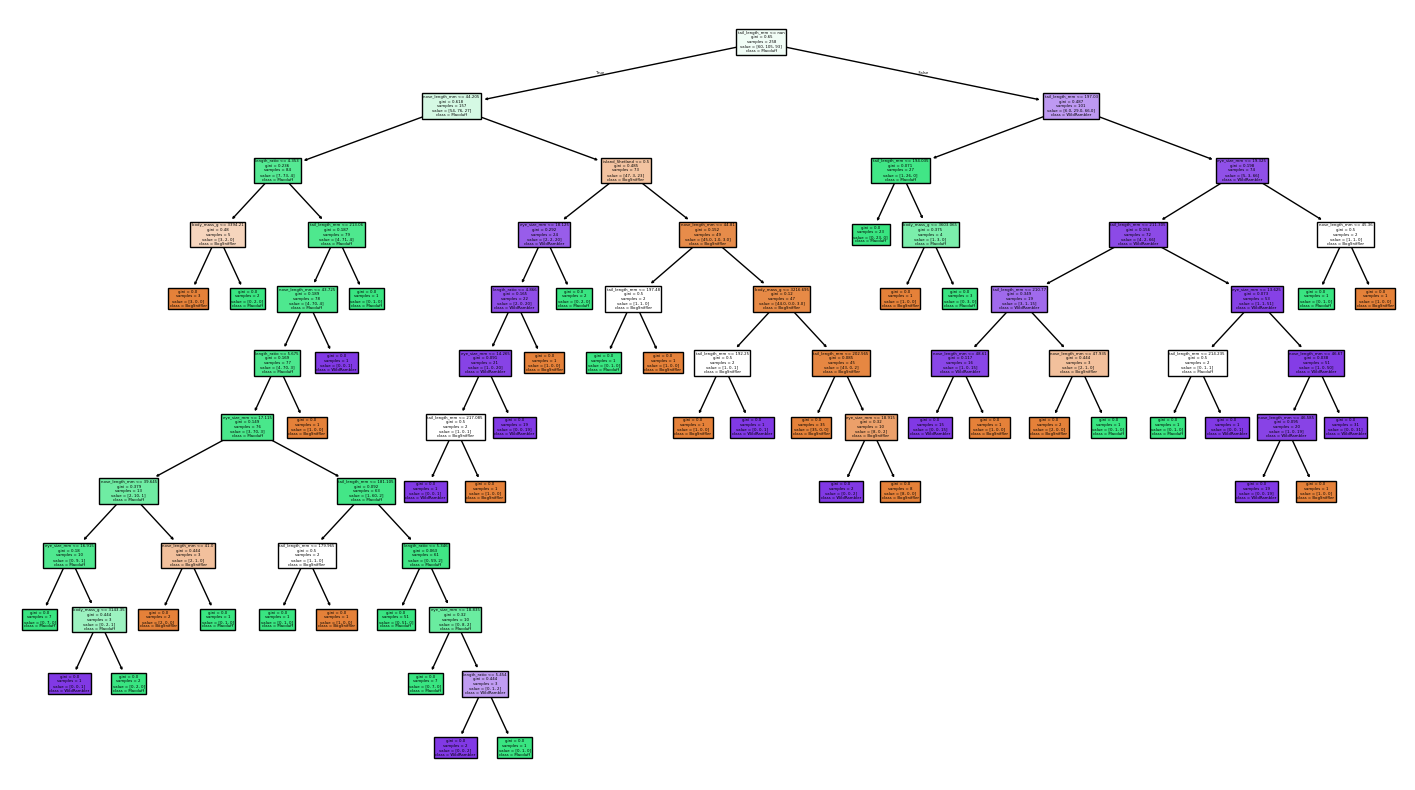

Accuracy with max_depth=4: 0.7441860465116279
Random Forest Accuracy: 0.9069767441860465


In [333]:
# Visualise the full Decision Tree
# This lets us see which features the model splits on and how complex the tree is.
from sklearn import tree

plt.figure(figsize=(18, 10))
tree.plot_tree(
    dt,
    feature_names=feature_names,
    class_names=dt.classes_,
    filled=True
)
plt.show()



# Train a smaller (pruned) Decision Tree
# Limiting the depth helps control overfitting.
dt2 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt2.fit(X_train_enc, y_train)

y_pred2 = dt2.predict(X_test_enc)
print("Accuracy with max_depth=4:", accuracy_score(y_test, y_pred2))



# Random Forest classifier
# Builds many trees and averages them, usually improving accuracy.
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_enc, y_train)

y_pred_rf = rf.predict(X_test_enc)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


### Stage 3 Conclusion

The Decision Tree offers a clear and interpretable baseline model, reaching around **73%** accuracy. It performs very well on the most distinct species—especially WildRambler—but finds it harder to separate BogSniffer from the other two groups. This mirrors the overlap observed in the EDA.

The feature importance results reinforce the earlier findings: tail length and nose length are the strongest predictors, while other features play smaller supporting roles. Categorical variables such as sex contribute very little.

Overall, the Decision Tree successfully captures the main patterns in the data and provides a solid benchmark for comparison with more flexible models like KNN and Logistic Regression in Stage 4.


<a id="stage4"></a>
## Stage 4: Comparative Classification (KNN & Logistic Regression)


In this stage, I build two additional classifiers — K-Nearest Neighbours (KNN) and Logistic Regression — and compare their performance with the Decision Tree from Stage 3. Both models require scaling, so a pipeline is used to ensure that encoding and scaling occur correctly after the train–test split.

Each model is evaluated using accuracy, confusion matrices, and classification reports. For Logistic Regression, I also examine the coefficients to understand which features increase or decrease the likelihood of belonging to each species. The goal is to understand which algorithms perform best on this dataset and why.

In [334]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Target variable we want to predict
y = df["species"]

# Feature set used for the models (numeric + categorical + engineered feature)
X = df[[
    "nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g",
    "island", "sex", "length_ratio"
]]

# Identify which columns are categorical and which are numeric
categorical = ["island", "sex"]
numeric = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g", "length_ratio"]

# Split the data — stratify ensures all species are represented proportionally in each split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Preprocessing for categorical features:
# - impute missing values with the most frequent category
# - one-hot encode the categories
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Preprocessing for numeric features:
# - impute missing values with the median
# - scale features so all numeric measurements are on a similar scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Combine numeric and categorical preprocessing into one transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical),
        ("num", numeric_transformer, numeric)
    ]
)


In [335]:
# Build a pipeline for KNN:
# - preprocess: handles imputation, encoding, and scaling
# - model: KNN with k=5 neighbours
knn = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Predict species for the test set
knn_pred = knn.predict(X_test)

# Evaluate performance
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))
print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

KNN Accuracy: 0.9069767441860465
KNN Confusion Matrix:
[[15  4  1]
 [ 0 35  0]
 [ 0  3 28]]
KNN Classification Report:
              precision    recall  f1-score   support

 BogSniffler       1.00      0.75      0.86        20
     Macduff       0.83      1.00      0.91        35
 WildRambler       0.97      0.90      0.93        31

    accuracy                           0.91        86
   macro avg       0.93      0.88      0.90        86
weighted avg       0.92      0.91      0.91        86



In [336]:
# Build a pipeline for Logistic Regression:
# - preprocess: handles imputation, encoding, and scaling
# - model: Logistic Regression (with higher max_iter to ensure convergence)
lr = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=500))
])

# Train the Logistic Regression model
lr.fit(X_train, y_train)

# Predict species for the test set
lr_pred = lr.predict(X_test)

# Evaluate model performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.9069767441860465

Logistic Regression Confusion Matrix:
[[15  4  1]
 [ 0 35  0]
 [ 0  3 28]]

Classification Report:
              precision    recall  f1-score   support

 BogSniffler       1.00      0.75      0.86        20
     Macduff       0.83      1.00      0.91        35
 WildRambler       0.97      0.90      0.93        31

    accuracy                           0.91        86
   macro avg       0.93      0.88      0.90        86
weighted avg       0.92      0.91      0.91        86



#### KNN Evaluation

The KNN model performs extremely well, achieving an accuracy of **91%**, which is a big improvement over the Decision Tree. The confusion matrix shows strong performance across all three species, with only a small number of misclassifications.

KNN works well here because the species differ in smooth, continuous ways (e.g., tail length, nose length, body mass). Since KNN classifies each test point by comparing it to similar examples in the training set, it handles the overlapping middle group — BogSniffler — much better than the Decision Tree, which tends to create sharp splits and can overfit.

Overall, KNN captures the natural structure in the data very effectively and sets a strong benchmark for comparison.



#### Logistic Regression Evaluation

Logistic Regression reaches the same accuracy as KNN (**91%**) and produces a very similar confusion matrix. This suggests that the species boundaries are fairly close to being linearly separable — meaning straight-line decision boundaries can capture most of the variation.

Macduff and WildRambler are classified extremely well, while BogSniffler remains the most challenging class because its measurements overlap with both extremes. Despite that, the model still performs strongly overall, showing that the physical measurements are highly predictive.



#### Interpretation of Logistic Regression Coefficients

The coefficients reveal how each feature influences the likelihood of belonging to each species:

- **nose_length_mm:** Longer noses increase the probability of BogSniffler and WildRambler, while shorter noses push predictions towards Macduff — matching the patterns seen in the EDA.
- **tail_length_mm:** WildRambler has a strong positive coefficient, reflecting its long tails; Macduff has a strong negative coefficient.
- **body_mass_g:** Heavier haggis are more likely to be WildRambler and less likely to be BogSniffler, consistent with the species descriptions.
- **length_ratio:** Higher ratios (long tail relative to nose) point toward WildRambler, while lower ratios point toward BogSniffler.
- **Island effects:** Island_Shetland helps slightly with distinguishing BogSniffler from Macduff, but these geographical effects are much weaker than the physical measurements.

Overall, the coefficients reinforce the main patterns seen across the entire project: size-related features like tail length, nose length, and body mass are the strongest predictors of species identity.



#### Stage 4 Conclusion

Both KNN and Logistic Regression clearly outperform the Decision Tree, achieving accuracies of about **91%**. These models deal much better with the smooth, continuous variation between species — especially in the overlapping BogSniffler region. Logistic Regression also provides helpful interpretability, confirming that the same morphological features highlighted in the EDA and clustering stages are driving species differences.

Overall, the results show a consistent picture: the physical measurements alone contain enough information to classify species reliably, and models based on distances or linear boundaries capture this structure best.


<a id="stage4"></a>
## Stage 5: Regression (Linear Regression)

In this stage, I use Linear Regression to predict the body mass of a haggis using its physical measurements and categorical attributes. This gives us insight into how strongly each feature contributes to overall size, and whether these relationships can be captured by a simple linear model.

As in the earlier supervised learning stages, numerical features are scaled and categorical variables are one-hot encoded using a preprocessing pipeline. The model is then evaluated using R², MAE, MSE, and RMSE, followed by an interpretation of the regression coefficients.

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Prepare the data for regression
# Drop rows where the target (body mass) is missing
df_reg = df.dropna(subset=["body_mass_g"])

# Target variable
y_reg = df_reg["body_mass_g"]

# Features used to predict body mass
X_reg = df_reg[[
    "nose_length_mm", "eye_size_mm", "tail_length_mm",
    "island", "sex", "length_ratio"
]]

# Identify categorical and numerical columns
categorical = ["island", "sex"]
numeric = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "length_ratio"]

# Split into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)

# Build preprocessing pipelines
# Categorical: impute missing values + one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Numerical: impute + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Combine preprocessing steps
preprocessor_reg = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical),
        ("num", numeric_transformer, numeric)
    ]
)

# Full pipeline: preprocessing + linear regression model
lr_reg = Pipeline(steps=[
    ("preprocess", preprocessor_reg),
    ("model", LinearRegression())
])

# Fit the model
lr_reg.fit(X_train_reg, y_train_reg)

# Predict body mass for the test set
y_pred_reg = lr_reg.predict(X_test_reg)

print("Regression model fitted successfully.\n")

# Calculate evaluation metrics
r2 = r2_score(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

print("R²:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


# Extract and display coefficients
# Retrieve the trained LinearRegression model
reg_model = lr_reg.named_steps["model"]

# Get the one-hot encoded feature names
encoded_features = (
    lr_reg.named_steps["preprocess"]
    .named_transformers_["cat"]
    .named_steps["onehot"]
    .get_feature_names_out(categorical)
    .tolist()
    + numeric
)

# Create a tidy coefficient table
coef_df_reg = pd.DataFrame({
    "feature": encoded_features,
    "coefficient": reg_model.coef_
}).sort_values(by="coefficient", ascending=False)

coef_df_reg


Regression model fitted successfully.

R²: 0.8007362472427295
MAE: 260.91271859266806
MSE: 106475.20605333828
RMSE: 326.30538771730124


,feature,coefficient
8,tail_length_mm,635.527434
5,sex_male,372.467576
2,island_Skye,185.259468
0,island_Iona,-9.739891
7,eye_size_mm,-47.033585
3,sex_female,-68.368334
1,island_Shetland,-175.519577
6,nose_length_mm,-233.236622
9,length_ratio,-235.645275
4,sex_green,-304.099242


### Regression Model Evaluation

The Linear Regression model explains around **80% of the variance** in body mass (R² ≈ 0.80), which is a strong result given the small number of features and the natural biological variation in the dataset.

The average prediction error is about **260 g** (MAE), and the RMSE is roughly **326 g**, which is very reasonable considering that body mass values range from around 2,500 g to more than 6,000 g.  
This indicates that the model captures most of the linear relationship between physical measurements and body mass. The remaining error likely comes from:

- non-linear relationships that a simple linear model cannot fully capture,  
- natural variation within each species, and  
- some overlap between individuals with similar measurements.



### Interpretation of Regression Coefficients

The coefficients show how each feature affects body mass after scaling:

- **Tail length (≈ +635 g per standardised unit)**  
  This is by far the strongest predictor. Haggis with longer tails are consistently heavier, which matches all earlier findings, especially the large size of the WildRambler species.

- **Sex effects**  
  - `sex_male`: **+372 g**  
  - `sex_female`: **–68 g**  
  Males tend to be heavier than females in this dataset, although the effect is much smaller than tail length.

- **Island effects**  
  - `island_Skye`: positive influence  
  - `island_Shetland`: negative influence  
  These geographical differences are modest but suggest some habitat-related variation.

- **Nose length, eye size, and length_ratio (negative coefficients)**  
  These negative coefficients are most likely due to **multicollinearity** — many physical measurements move together.  
  The model assigns negative weights to avoid counting the same size signal multiple times, even though biologically these features do correlate with body mass.

Overall, the coefficient patterns further reinforce that **tail length is the dominant driver of body size**, with sex and island contributing smaller, secondary effects.



### Stage 5 Conclusion

Linear Regression provides a clear and interpretable understanding of how physical features relate to body mass. With an R² of roughly **0.80**, the model captures most of the meaningful variation in the dataset and identifies tail length as the most influential predictor.

Sex and island contribute smaller effects, while several correlated features receive negative coefficients due to how linear models handle shared signals.  
Even so, the results align strongly with all earlier analyses — clustering, classification, and EDA — showing that **haggis morphology, especially tail length, is the strongest indicator of body size**.



<a id="pca"></a>

## Optional: Principal Component Analysis (PCA)

Although the dataset only contains a small number of features, PCA is still a useful tool for visualising the overall structure of the data in two dimensions. It allows us to check whether the species naturally form separable groups based on their measurements, even without any labels.

In this section, I apply PCA to the scaled numerical features and plot the first two principal components. This doesn’t replace any of the earlier models, but it provides a helpful visual confirmation of the patterns identified throughout the analysis.


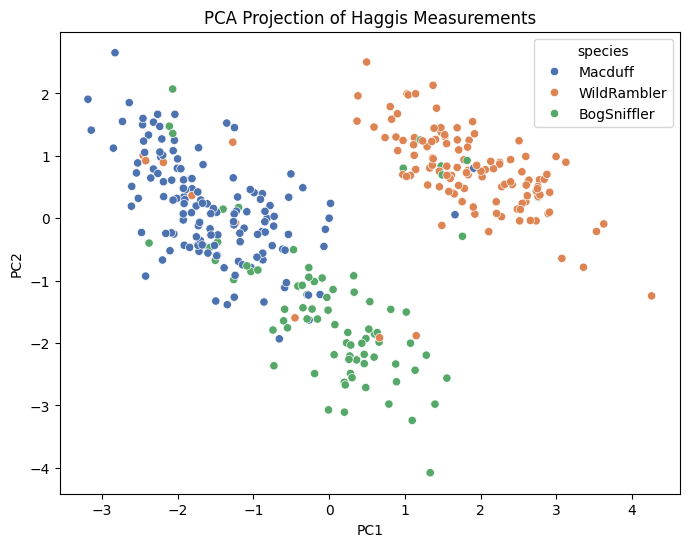

Explained variance by PC1 and PC2: [0.58127051 0.28741089]


In [338]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Numerical features selected for PCA
num_cols = ["nose_length_mm", "eye_size_mm", "tail_length_mm",
            "body_mass_g", "length_ratio"]

# Impute missing values with the column mean
imputer = SimpleImputer(strategy="mean")
X_num = imputer.fit_transform(df[num_cols])

# Scale the numerical features so PCA treats them equally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# Apply PCA and keep only the first two principal components
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

# Build a DataFrame for easy plotting
pca_df = pd.DataFrame({
    "PC1": pcs[:, 0],
    "PC2": pcs[:, 1],
    "species": df["species"]
})

# Visualise the PCA projection
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="species", palette="deep")
plt.title("PCA Projection of Haggis Measurements")
plt.show()

print("Explained variance by PC1 and PC2:", pca.explained_variance_ratio_)


### PCA Interpretation

The PCA plot shows a clear and intuitive separation between the three haggis species, even though PCA is completely unsupervised. The first two principal components explain around **87% of the total variance** (PC1 ≈ 58%, PC2 ≈ 29%), meaning that almost all meaningful structure in the data can be captured in just two dimensions.

- **WildRambler**  
  Forms a distinct cluster on the right-hand side. This makes sense given their larger size: long tails and high body mass dominate PC1.

- **Macduff**  
  Appears clearly on the left-hand side, forming a tight and compact cluster. Their smaller and more consistent body measurements contribute to this grouping.

- **BogSniffler**  
  Occupies the middle space between the other two species. They show moderate variation across PC1 and PC2, reflecting their intermediate morphology.

Overall, PCA confirms the strong structural differences identified throughout the project: the species differ enough in their measurements that they separate cleanly in a low-dimensional space. Although PCA wasn’t needed for dimensionality reduction in this assignment, it provides a useful visual summary and supports the conclusions from clustering and classification.


<a id="conclusion"></a>

## Overall Conclusion

Taken together, all stages of the analysis point to a very consistent story about the structure of the Scottish Haggis dataset. The initial EDA highlighted strong and biologically meaningful differences between species, especially in tail length, nose length, and body mass and these same patterns continued to appear throughout the project.

The unsupervised learning methods showed that the species naturally separate into three distinct groups. K-Means identified these clusters cleanly, DBSCAN added nuance by highlighting borderline cases, and PCA confirmed that most of the meaningful variation in the data can be represented in just two dimensions.

The supervised learning models reinforced these findings. The Decision Tree provided an interpretable baseline, capturing the broad structure of the data. KNN and Logistic Regression substantially improved performance, showing that the species are best distinguished by smooth, continuous changes in their measurements rather than sharp thresholds. The regression analysis echoed the same patterns, revealing tail length as the strongest single predictor of body mass, with sex and island adding smaller effects.

Overall, the results across EDA, clustering, classification, regression, and PCA align remarkably well. The dataset contains clear, well-defined structure, and the physical measurements are highly informative for both species identification and size prediction. The consistency across all methods increases confidence in these conclusions and shows the value of using multiple analytical approaches to build a complete understanding of the data.
